In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math

### DataSet

In [51]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

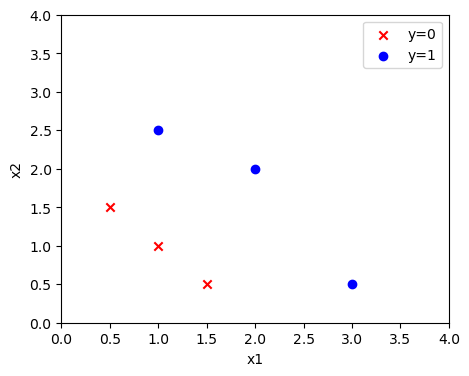

In [58]:
def plot_logistic_data(X, y, ax):
    ax.scatter(X[y==0, 0], X[y==0, 1], c='r',label='y=0', marker='x')
    ax.scatter(X[y==1, 0], X[y==1, 1], c='b',label='y=1', marker='o')
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()
    #plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,4))
plot_logistic_data(X_train, y_train, ax)
plt.show()


##### Calculating Gradient of the logistic function aka getting the value of the derivative used in gradient descent.

In [53]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    -----------
    z : array-like
        A scalar or numpy array of any size
    
    Returns
    --------

    g : array-like
        The sigmoid of z
    """
    z = np.clip(z, -500, 500)
    g = 1 / (1 + np.exp(-z))
    return g

def compute_gradient_logistic(X, Y, W, b):
    """
    Compute the gradient of the loss function with respect to W and b

    Parameters
    -----------
    X : array-like
        A numpy array of shape (m, n) where m is the number of samples and n is the number of features
    Y : array-like
        A numpy array of shape (m,) where m is the number of samples
    W : array-like
        A numpy array of shape (n,) where n is the number of features
    b : float
        A scalar representing the bias term

    Returns
    --------
    dj_dw : array-like
        A numpy array of shape (n,) representing the gradient of the loss function with respect to W. 
        Here n is the number of features.
    db : float
        A scalar representing the gradient of the loss function with respect to b
    """
    m,n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(W, X[i]) + b)
        error = f_wb_i - Y[i]
        for j in range(n):
            dj_dw[j] += error * X[i][j]
        dj_db += error
    dj_dw = 1/m * dj_dw
    dj_db = 1/m * dj_db
    
    return dj_dw, dj_db

In [54]:
# Compute the gradient of the loss function with respect to W and b
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: [0.5 0.5]
dj_dw: 0.49861806546328574


#### Now that we have the gradient, lets calculate the gradient descent of the logistic function.

In [55]:
def gradient_descent(X_train, Y, W, b, num_iters, alpha):
    """
    Perform gradient descent to learn the parameters W and b

    Parameters
    -----------
    X_train : array-like
        A numpy array of shape (m, n) where m is the number of samples and n is the number of features
    Y : array-like
        A numpy array of shape (m,) where m is the number of samples
    W : array-like
        A numpy array of shape (n,) where n is the number of features
    b : float
        A scalar representing the bias term
    num_iters : int
        The number of iterations to perform gradient descent
    alpha : float
        The learning rate

    Returns
    --------
    W : array-like
        A numpy array of shape (n,) representing the learned parameters W. 
        Here n is the number of features.
    b : float
        A scalar representing the learned bias term
    """

    # definition of equality
    epsilon = 1e-4

    m, n = X_train.shape
    
    for i in range(num_iters):
        # compute the gradient
        dj_dw, dj_db = compute_gradient_logistic(X_train, Y, W, b)

        # Store the parameters in a temporary variable
        new_W = W - alpha * dj_dw
        new_b = b - alpha * dj_db
        found = 0
        for j in range(n):
            if abs(new_W[j] - W[j]) < epsilon:
                found = found + 1
        if abs(new_b - b) < epsilon:
            found = found + 1
        if found == n+1:
            print("Converged after", i, "iterations")
            break

        # update the parameters
        W = new_W
        b = new_b

        if i% math.ceil(num_iters / 100) == 0:
            print(f"Iteration {i:4d}: W =  {W} and b = {b}")
    return W, b


# initial values for W and b
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.

# learning rate
alpha = 1e-1

# number of iterations
num_iters = 10000

W_out, b_out = gradient_descent(X_train, y_train, w_tmp, b_tmp, num_iters, alpha)


Iteration    0: W =  [0.03 0.02] and b = 0.0
Iteration  100: W =  [0.6  0.35] and b = -0.9623116161256773
Iteration  200: W =  [0.91 0.64] and b = -1.840345297485483
Iteration  300: W =  [1.16 0.9 ] and b = -2.593047015876586
Iteration  400: W =  [1.38 1.13] and b = -3.2458900988917208
Iteration  500: W =  [1.58 1.33] and b = -3.8187024477420515
Iteration  600: W =  [1.75 1.51] and b = -4.326779852366586
Iteration  700: W =  [1.91 1.67] and b = -4.781891794042321
Iteration  800: W =  [2.05 1.82] and b = -5.193141755067223
Iteration  900: W =  [2.19 1.95] and b = -5.567637899903494
Iteration 1000: W =  [2.31 2.08] and b = -5.9109933019066005
Iteration 1100: W =  [2.42 2.19] and b = -6.227692860070964
Iteration 1200: W =  [2.52 2.3 ] and b = -6.521361736477952
Iteration 1300: W =  [2.62 2.39] and b = -6.794962657616278
Iteration 1400: W =  [2.71 2.49] and b = -7.050942136612444
Iteration 1500: W =  [2.79 2.57] and b = -7.291339931082341
Iteration 1600: W =  [2.87 2.65] and b = -7.5178718

##### Test the output by plotting the decision boundary

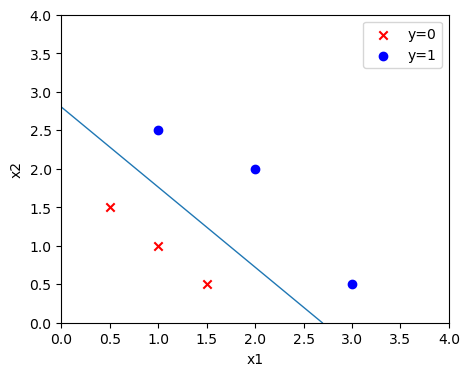

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

# plot the data
plot_logistic_data(X_train, y_train, ax)

# plot the decision boundary
x0 = -b_out/W_out[0]
x1 = -b_out/W_out[1]
ax.plot([0,x0],[x1,0], lw=1)
plt.show()
